<img src="docs/braitenberg1.png">

<img src="docs/braitenberg2.png">

## Braitenberg Simulator  

Simulates a Braitenberg vehicle. 

#### boilerplate import code

In [1]:
# magic jupyter notebook commands
%matplotlib inline 
%config InlineBackend.figure_format='retina'

import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as arr
from math import sin, cos, sqrt

# matlab-like structs for convenient access:
class Bunch(dict): 
    def __init__(self): self.__dict__ = self

#### constants

In [2]:
p = Bunch() # parameters bunch
p.l = .2 # vehicle length [m]
p.w = .1 # vehicle width
p.light_source_pos = (1, 1) # [m, m]

#### Simulation: (full, nonlinear) dynamics and sensor functions
The main dynamics function returns the derivative of the state vector at each time step. 

In [26]:
def robot_dynamics(q, u, p):
    # extract state and inputs
    theta = q[2] 
    left_wheel_velocity = u[0] 
    right_wheel_velocity = u[1] 
    
    velocity = np.mean(u) # mean of left and right wheels
    xdot = velocity * cos(theta) 
    ydot = velocity * sin(theta) 
    thetadot = (right_wheel_velocity - left_wheel_velocity) / p.w 
    
    qdot = arr((xdot, ydot, thetadot)) 
    return qdot

def environment(q, p):
    # extract state
    x = q[0]
    y = q[1] 
    theta = q[2]
     
    x_left = x - p.w/2 * sin(theta) 
    y_left = y + p.w/2 * cos(theta) 
    x_right = x + p.w/2 * sin(theta) 
    y_right = y - p.w/2 * cos(theta)     

    distance_to_left_sensor = \
        sqrt((x_left - p.light_source_pos[0])**2 + (y_left - p.light_source_pos[1])**2)
    distance_to_right_sensor = \
        sqrt((x_right - p.light_source_pos[0])**2 + (y_right - p.light_source_pos[1])**2)
    
    distances = arr((distance_to_left_sensor, distance_to_right_sensor))
    return distances

def light_response_aggressive(distances, p):
    distance_to_left_sensor = distances[0]
    distance_to_right_sensor = distances[1] 
    left_wheel_velocity = 1 / distance_to_left_sensor 
    right_wheel_velocity = 1 / distance_to_right_sensor 
 
    u = arr((right_wheel_velocity, left_wheel_velocity)) # vehicle 2b, aggressive 
    return u

def light_response_coward(distances, p):
    distance_to_left_sensor = distances[0]
    distance_to_right_sensor = distances[1] 
    left_wheel_velocity = 1 / distance_to_left_sensor 
    right_wheel_velocity = 1 / distance_to_right_sensor 
 
    u = arr((left_wheel_velocity, right_wheel_velocity)) # vehicle 2a, coward 
    return u

def light_response_vehicle4(distances, p):
    distance_to_left_sensor = distances[0]
    distance_to_right_sensor = distances[1] 
 
    left_intensity = 1 / distance_to_left_sensor
    right_intensity = 1 / distance_to_right_sensor
    right_wheel_velocity = np.exp(-(left_intensity-1)**2/2) 
    left_wheel_velocity = np.exp(-(right_intensity-1)**2/2) 
     
    u = arr((left_wheel_velocity, right_wheel_velocity))
    return u


Coward vehicle

Text(0, 0.5, 'y position (m)')

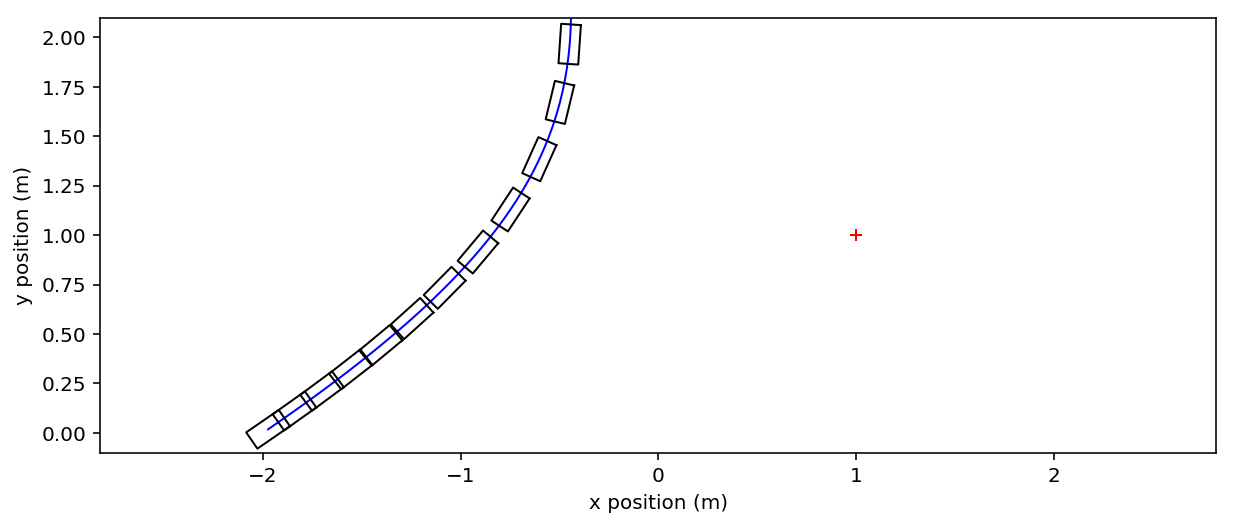

In [24]:
# initialize state and data logs 
q = arr((-2, 0, .6)) # initial state [x, y, theta] [m, m, rad]
u = arr([0, 0]) # initial input
dt = 0.1
t_final = 6
time = np.arange(0,t_final,dt) # equivalent to matlab 0:dt:t_final
q_data = np.zeros((len(time), len(q)))
u_data = np.zeros((len(time), len(u)))

for idx,t in enumerate(time):
    distances_to_light = environment(q, p)
    u = light_response_coward(distances_to_light, p) 
    q = q + dt * robot_dynamics(q, u, p)
    u_data[idx,:] = u
    q_data[idx,:] = q

def plotbox(x, y, theta, p, color='k'):
    h = p.w/2; v = p.l/2
    theta = -theta + np.pi/2
    R = arr(((np.cos(theta), np.sin(theta)), (-np.sin(theta), np.cos(theta))))
    points = arr(((h, h, -h, -h, h), (v, -v, -v, v, v)))
    rotated_points = R @ points 
    plt.plot(rotated_points[0,:] + x, rotated_points[1,:] + y, color=color, lw=1)
     
plt.figure(figsize=(10,4))        
plt.plot(q_data[:,0], q_data[:,1], 'b', lw=1) # trajectory
for q in q_data[::int(0.5/dt),:]: # rectangles
    plotbox(*q, p)
plt.plot(p.light_source_pos[0], p.light_source_pos[1], 'r+', lw=1)
plt.axis('equal')
plt.axis([-.5, .5, -.1 , 2.1])
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')

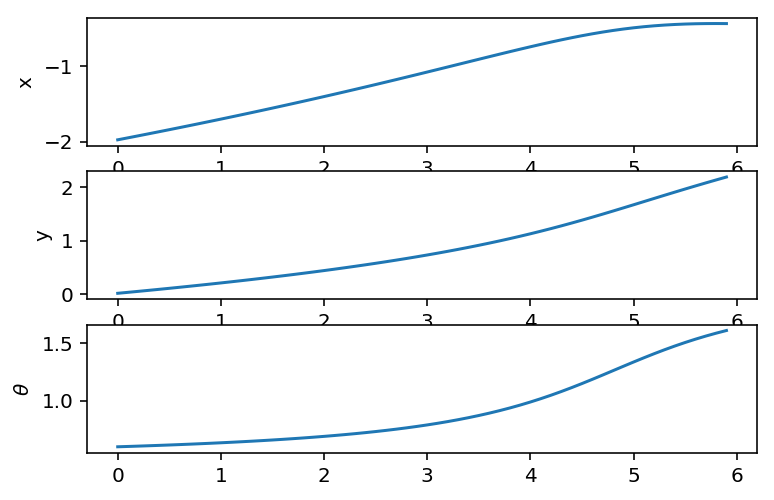

In [13]:
ylabels=('x', 'y', r'$\theta$')
plt.subplot(len(q),1,1)
for idx in range(len(q)):
    plt.subplot(len(q),1,idx+1)
    plt.plot(time, q_data[:,idx])
    plt.ylabel(ylabels[idx])


In [ ]:
Aggressive Vehicle

Text(0, 0.5, 'y position (m)')

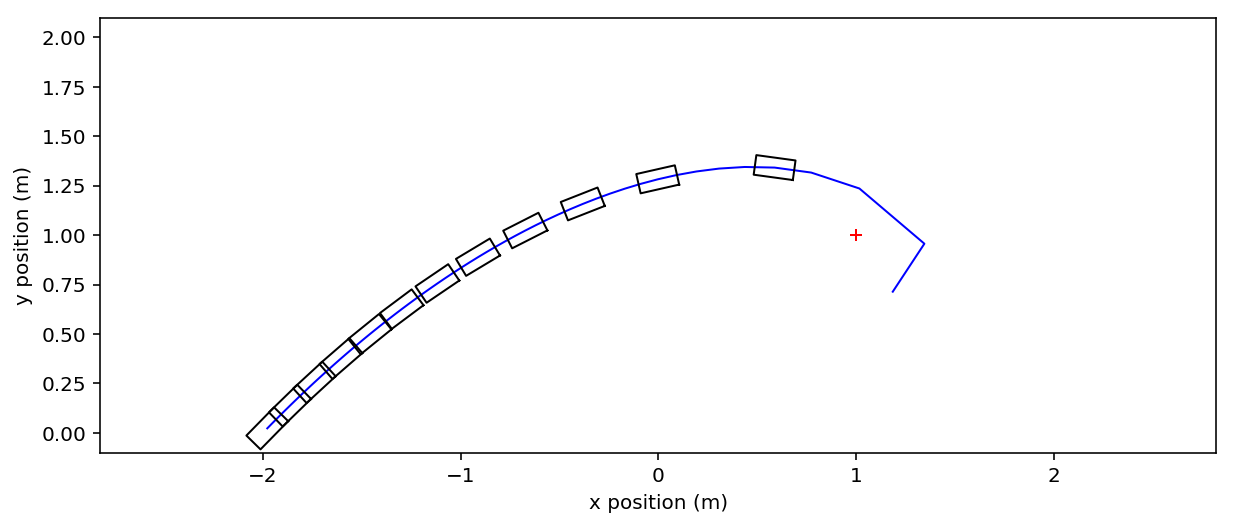

In [16]:
# initialize state and data logs 
q = arr((-2, 0, .8)) # initial state [x, y, theta] [m, m, rad]
u = arr([0, 0]) # initial input
dt = 0.1
t_final = 6
time = np.arange(0,t_final,dt) # equivalent to matlab 0:dt:t_final
q_data = np.zeros((len(time), len(q)))
u_data = np.zeros((len(time), len(u)))

for idx,t in enumerate(time):
    distances_to_light = environment(q, p)
    u = light_response_aggressive(distances_to_light, p) 
    q = q + dt * robot_dynamics(q, u, p)
    u_data[idx,:] = u
    q_data[idx,:] = q

def plotbox(x, y, theta, p, color='k'):
    h = p.w/2; v = p.l/2
    theta = -theta + np.pi/2
    R = arr(((np.cos(theta), np.sin(theta)), (-np.sin(theta), np.cos(theta))))
    points = arr(((h, h, -h, -h, h), (v, -v, -v, v, v)))
    rotated_points = R @ points 
    plt.plot(rotated_points[0,:] + x, rotated_points[1,:] + y, color=color, lw=1)
     
plt.figure(figsize=(10,4))        
plt.plot(q_data[:,0], q_data[:,1], 'b', lw=1) # trajectory
for q in q_data[::int(0.5/dt),:]: # rectangles
    plotbox(*q, p)
plt.plot(p.light_source_pos[0], p.light_source_pos[1], 'r+', lw=1)
plt.axis('equal')
plt.axis([-.5, .5, -.1 , 2.1])
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')

In [ ]:
Instinct Vehicle

Text(0, 0.5, 'y position (m)')

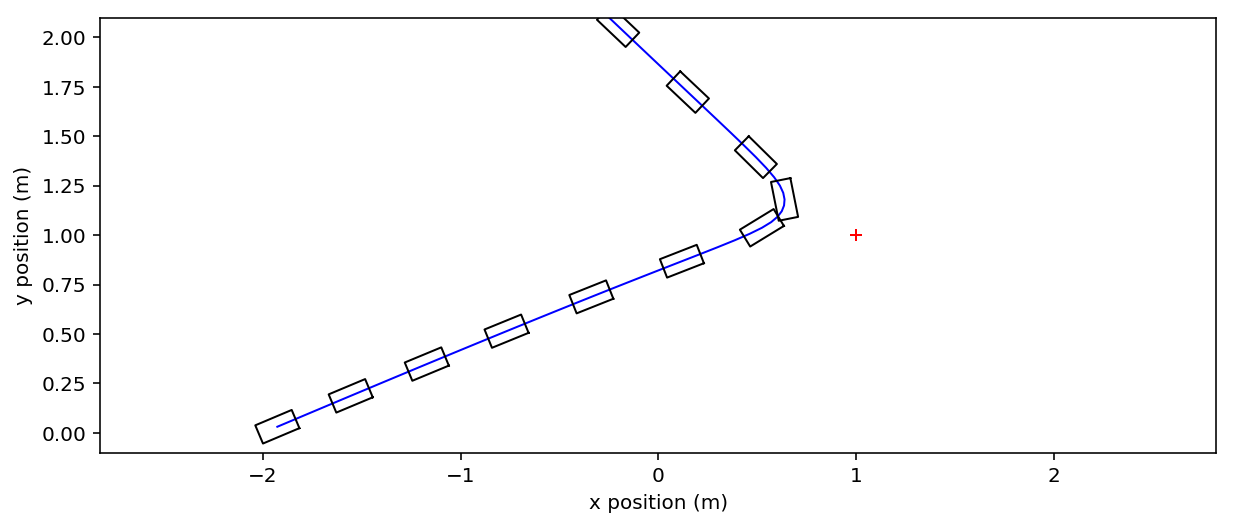

In [29]:
# initialize state and data logs 
q = arr((-2, 0, .4)) # initial state [x, y, theta] [m, m, rad]
u = arr([0, 0]) # initial input
dt = 0.1
t_final = 6
time = np.arange(0,t_final,dt) # equivalent to matlab 0:dt:t_final
q_data = np.zeros((len(time), len(q)))
u_data = np.zeros((len(time), len(u)))

for idx,t in enumerate(time):
    distances_to_light = environment(q, p)
    u = light_response_vehicle4(distances_to_light, p) 
    q = q + dt * robot_dynamics(q, u, p)
    u_data[idx,:] = u
    q_data[idx,:] = q

def plotbox(x, y, theta, p, color='k'):
    h = p.w/2; v = p.l/2
    theta = -theta + np.pi/2
    R = arr(((np.cos(theta), np.sin(theta)), (-np.sin(theta), np.cos(theta))))
    points = arr(((h, h, -h, -h, h), (v, -v, -v, v, v)))
    rotated_points = R @ points 
    plt.plot(rotated_points[0,:] + x, rotated_points[1,:] + y, color=color, lw=1)
     
plt.figure(figsize=(10,4))        
plt.plot(q_data[:,0], q_data[:,1], 'b', lw=1) # trajectory
for q in q_data[::int(0.5/dt),:]: # rectangles
    plotbox(*q, p)
plt.plot(p.light_source_pos[0], p.light_source_pos[1], 'r+', lw=1)
plt.axis('equal')
plt.axis([-.5, .5, -.1 , 2.1])
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')